# Skills Unlocked
- Data Scraping
- Data Cleaning 
- Data Exploration
- Data Visualization & Presentation
- Data Analysis & Insights

# Objectives
**Exploring econ data using Fred API:**
1. Unemployment vs. Participation Rate (Guided by https://www.youtube.com/watch?v=R67XuYc9NQ4 | Source Code: https://www.kaggle.com/code/robikscube/economic-analysis-with-pandas-youtube-tutorial/notebook) 
2. How unemployment rate affect the return of SP500 (Unguided)
3. How bonds affect the return of SP500 (Unguided)
4. How the fed rate & inflation affect the return of SP500 (Unguided)


## Importing Libs

In [102]:
import pandas as pd
import numpy as np 

# Data
from fredapi import Fred 
fred = Fred(api_key='90e9e49b1e97108193493ea0ee418912')

# Visualizations
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_theme(style="darkgrid")


## Searching & Selecting The Benchmark 

In [103]:
pop_df = fred.search('S&P', order_by='popularity')
pop_df.info() # default is 1000 rows by 15 columns

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, BAMLH0A0HYM2 to HCIYISILA066NRUG
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         1000 non-null   object        
 1   realtime_start             1000 non-null   datetime64[ns]
 2   realtime_end               1000 non-null   datetime64[ns]
 3   title                      1000 non-null   object        
 4   observation_start          1000 non-null   datetime64[ns]
 5   observation_end            1000 non-null   datetime64[ns]
 6   frequency                  1000 non-null   object        
 7   frequency_short            1000 non-null   object        
 8   units                      1000 non-null   object        
 9   units_short                1000 non-null   object        
 10  seasonal_adjustment        1000 non-null   object        
 11  seasonal_adjustment_short  1000 non-null   object  

In [104]:
pop_df.head() # show first 5 rows

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2022-08-13,2022-08-13,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2022-08-11,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-08-12 09:24:02-05:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2022-08-13,2022-08-13,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-07-26 08:02:02-05:00,89,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2022-08-13,2022-08-13,ICE BofA US High Yield Index Effective Yield,1996-12-31,2022-08-11,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-08-12 09:24:06-05:00,84,This data represents the effective yield of th...
SP500,SP500,2022-08-13,2022-08-13,S&P 500,2012-08-13,2022-08-12,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-08-12 19:11:00-05:00,82,The observations for the S&P 500 represent the...
CSUSHPISA,CSUSHPISA,2022-08-13,2022-08-13,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2022-07-26 08:02:05-05:00,81,"For more information regarding the index, plea..."


In [105]:
# Select the S&P 500
sp500 = fred.get_series(series_id='SP500') 

Text(0.5, 1.0, 'S&P 500')

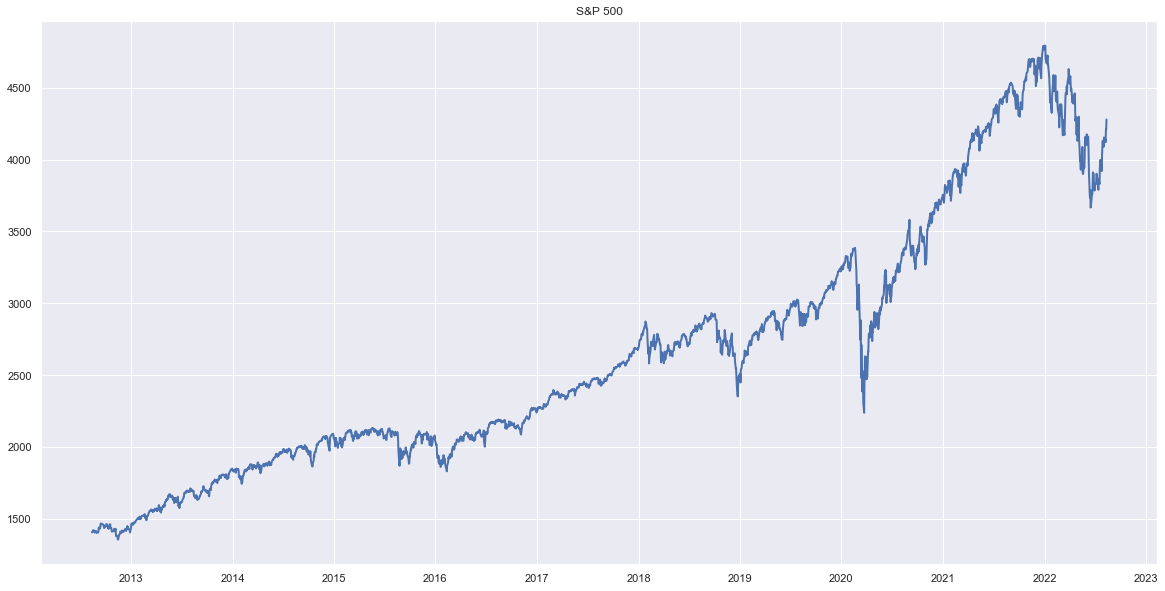

In [106]:
# Plotting the SP500 in line chart
sns.set(rc={'figure.figsize':(20,10), 'lines.linewidth': 2}) # might be better if put it after importing seaborn
sns.lineplot(data=sp500).set_title('S&P 500')

## Preparing Unemployment Rate Data
- **Notice the inconsistencies:**
    - The column of "seasonal_adjustment" contains *Not Seasonally Adjusted* & *Seasonally Adjusted* (for short term analysis, seasonal adjustment data will be best.)
    - The "frequency_short" column contains *Week|Month|Quarterly|Annual* (unemployment rate comes out every month so monthly)
    - The "units" column contains *percentage|number* (% to better gauge at the changes)

In [107]:
# search any thing that is relate to unemployment to explore the available data provided by FRED 
unrate_states = fred.search('unemployment rate state')
# query the necessary data to get the only monthly data, seasonal adjustment, and units as percent
unrate_states = unrate_states.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent" and frequency == "Monthly"') # Notice the rows shrunk down in size & the selected data needs to be exact 
# select title conlumn but only relevent the Unemployment Rate (str) then locate where that is true
unrate_states = unrate_states.loc[unrate_states['title'].str.contains('Unemployment Rate in')] 
# get rid of repetitive columns such as the seasonality adjustment shorts so anything that has _shorts at the end (optional)
unrate_states = unrate_states.drop(['seasonal_adjustment_short','frequency_short','units_short'], axis=1)
# get rid of the rows that contains the following words "DISCONTINUED", "Region","Division","District" in the title column
unrate_states = unrate_states.drop(unrate_states[unrate_states['title'].str.contains('|'.join(['DISCONTINUED','Region','Division','District', 'Puerto']))].index) 
# get rid of the rows that contains numeric values in the id column
unrate_states = unrate_states.drop(unrate_states[unrate_states['id'].str.contains('\d')].index)
# sort by most popular
unrate_states = unrate_states.sort_values(by='popularity', ascending=False)
# r

unrate_states # So cleaaaaaaaan OMG!

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,units,seasonal_adjustment,last_updated,popularity,notes
series id,,,,,,,,,,,,
CAUR,CAUR,2022-08-13,2022-08-13,Unemployment Rate in California,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:01-05:00,53,None
FLUR,FLUR,2022-08-13,2022-08-13,Unemployment Rate in Florida,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:02-05:00,48,None
TXUR,TXUR,2022-08-13,2022-08-13,Unemployment Rate in Texas,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:03-05:00,46,None
NYUR,NYUR,2022-08-13,2022-08-13,Unemployment Rate in New York,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:05-05:00,42,None
OHUR,OHUR,2022-08-13,2022-08-13,Unemployment Rate in Ohio,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:05-05:00,40,None
MIUR,MIUR,2022-08-13,2022-08-13,Unemployment Rate in Michigan,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:06-05:00,37,None
PAUR,PAUR,2022-08-13,2022-08-13,Unemployment Rate in Pennsylvania,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:06-05:00,36,None
MAUR,MAUR,2022-08-13,2022-08-13,Unemployment Rate in Massachusetts,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:05-05:00,32,None
COUR,COUR,2022-08-13,2022-08-13,Unemployment Rate in Colorado,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:10-05:00,32,None


In [108]:
unrate_states.shape # rows should be 50 states

(50, 12)

In [110]:
# Go through each of the series & pull only the UNRATE data using the id 
all_unrate_states = []
for each_state in unrate_states.index:
    r = fred.get_series(each_state)
    r=r.to_frame(name=each_state) # get data for each state & convert to dataframe
    all_unrate_states.append(r)



In [111]:
# combine them to a single dataframe on x axis
unemp_final_ = pd.concat(all_unrate_states, axis=0)

In [112]:
unemp_results

,CAUR,FLUR,TXUR,NYUR,OHUR,MIUR,PAUR,MAUR,COUR,ALUR,...,RIUR,WYUR,KYUR,NJUR,KSUR,MEUR,DEUR,SDUR,VTUR,NHUR
1976-01-01,9.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,9.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7
2022-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4
2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3
2022-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1


In [98]:
# More Data Cleaning
unemp_results = unemp_results.dropna()
unemp_results

,CAUR,FLUR,TXUR,NYUR,OHUR,MIUR,PAUR,MAUR,COUR,ALUR,...,RIUR,WYUR,KYUR,NJUR,KSUR,MEUR,DEUR,SDUR,VTUR,NHUR


In [95]:
abbrev_to_full = unrate_states['title'].str.replace('Unemployment Rate in ','').to_dict() # Change the abbreviations to full names for the states

[abbrev_to_full[c] for c in unrate_states.columns]


KeyError: 'id'

In [94]:
px.line(uemp_states)

NameError: name 'uemp_states' is not defined

KeyError: 'id'

## Unemployment Rate Vs. The S&P500 (Not Yet Started)

## Bonds Vs. The S&P500 (Not Yet Started)

## Fed Rate | Inflation Vs. The S&P500 (Not Yet Started)